# Esli Jônatas Brito de Souza

## Resumo Descobertas:

- Dentre 9.742 filmes cadastrados, apenas 450 destes possuem cinquenta ou mais votos, mesmo o arquivo de votos tendo 100.836 registros;
- Todos os testes foram realizados tendo como base estes 450 filmes;
- Para um filme estar entre os 20% mais bem avaliados sua nota deve ser igual ou superior a 3,99;
- Há 19 gêneros distintos de filmes, informação possível de ser encontrada ao segregarmos os gêneros do campo "genres" de "movies.csv";
- Os cinco gêneros com mais filmes são o de Comedy, Drama, Action, Adventure e Thriller;
- Os cinco gêneros mais assistidos são o de Action, Drama, Comedy, Adventure e Thriller;
- Os dois itens anteriores demonstram que os gêneros com mais filmes também são os mais assistidos;
- Entretanto, a popularidade (quantidade de votos por filmes) não segue a mesma tendência, pois os cinco mais populares são War, Crime, Adventure, Thriller e SciFi;
- Foram criadas análises visuais e testes estatísticos entre as distribuições de votos e de notas ao comparar gêneros diferentes;
- A escolha de um gênero depende de seu objetivo, seja ele sucesso de critica, popularidade, quantidade de visualizações, entre outros;
- Os top 5 filmes dentre os dois gêneros mais assistidos são "Forrest Gump (1994)", "Shawshank Redemption, The (1994)", "Pulp Fiction (1994)", "Matrix, The (1999)", "Star Wars: Episode IV - A New Hope (1977)";
- Os dois gêneros com maior correlação com a nota média são o Drama e Comedy;
- Os dois gêneros com menor correlação com a nota média são o Documentary e Musical;
- Os dois gêneros com maior correlação com o total de votos são o Comedy e Adventure;
- Os dois gêneros com menor correlação com o total de votos são o Children e Mystery;
- A grande concentração de votos na década de 90, onde justamente apresentaram-se notas médias menores, influenciou os resultados de correlação entre ano de lançamento e nota média tornando-os não confiáveis, pois não se trata de uma comparação justa;
- Traçando uma regressão linear entre ano de lançamento, notas médias e total de votos, pode-se observar uma correlação negativa entre nota média e ano de lançamento, outra correlação negativa, porém menor, entre ano de lançamento e total de votos e uma correlação positiva entre nota média e total de votos. Elas indicam que com o passar dos anos tanto a nota média quanto o total de votos tendem a cair. Indicam também que os filmes mais assistidos tendem a ter notas mais altas;
- Ao fazer esta mesma análise porém segregando o gênero Animation, observamos que este gênero sege uma tendência oposta aos demais quanto aos efeitos do passar dos anos nas variáveis nota média e total de votos, ou seja, a cada ano essas variáveis tendem a subir;
- Foram comparadas relações entre as variáveis dos gêneros Fantasy e Children. Embora apenas 28,41% dos filmes possuam ambos gêneros, dentre os que foram classificados com pelo menos um destes gêneros, observou-se uma grande semelhança entre as distribuições de votos e notas de seus filmes. Isso pode indicar que ambos gêneros possuam características em comum, como, por exemplo, grande parte de seus públicos em comum, entre várias outras características que eles possam ter em comum.

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [82]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [83]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [84]:
# solução
filmes = pd.read_csv("movies.csv", index_col=False)
filmes.columns = ['filmeId', "titulo", "generos"]
filmes.set_index('filmeId', inplace=True)

In [85]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [86]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [87]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [88]:
# solução
notas = pd.read_csv("ratings.csv", index_col=False)
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.set_index('usuarioId', inplace=True)

In [89]:
notas.head()

,filmeId,nota,momento
usuarioId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [90]:
# solução
filmes['nota_media'] = notas.groupby("filmeId").mean()["nota"]

In [91]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [92]:
# solução para calcular o total de votos por filme
filmes['total_de_votos'] = notas.groupby("filmeId").count()["nota"]

In [93]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query("total_de_votos >= 50")

In [94]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Distribuição de notas médias dentre os filmes com 50 ou mais votos')

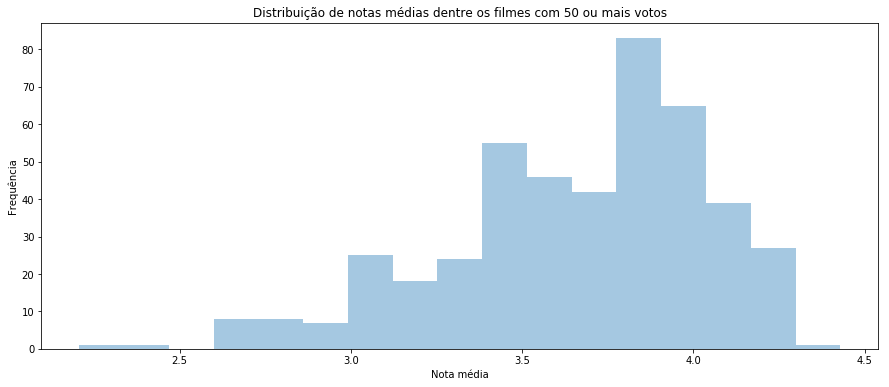

In [95]:
# solução histograma
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 6))
ax = sns.distplot(filmes.nota_media, kde=False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Distribuição de notas médias dentre os filmes com 50 ou mais votos")

Text(0.5, 1.0, 'Distribuição cumulativa de notas médias dentre os filmes com 50 ou mais votos')

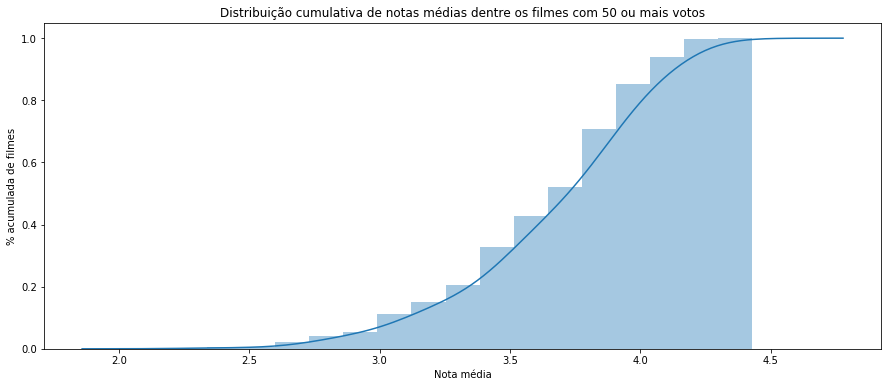

In [96]:
# solução cumulativa
plt.subplots(figsize=(15, 6))
ax = sns.distplot(filmes.nota_media, 
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Distribuição cumulativa de notas médias dentre os filmes com 50 ou mais votos")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Distribuição de total de votos dentre os filmes com 50 ou mais votos')

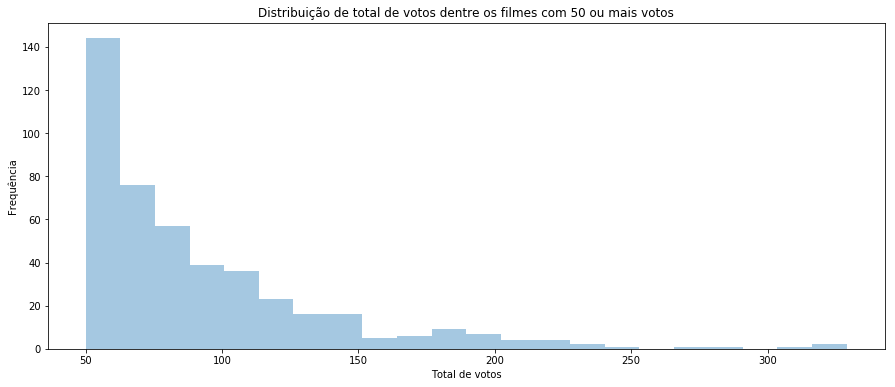

In [97]:
# solução histograma
plt.subplots(figsize=(15, 6))
ax = sns.distplot(filmes.total_de_votos, kde=False)
ax.set(xlabel="Total de votos", ylabel="Frequência")
ax.set_title("Distribuição de total de votos dentre os filmes com 50 ou mais votos")

Text(0.5, 1.0, 'Distribuição cumulativa de total de votos dentre os filmes com 50 ou mais votos')

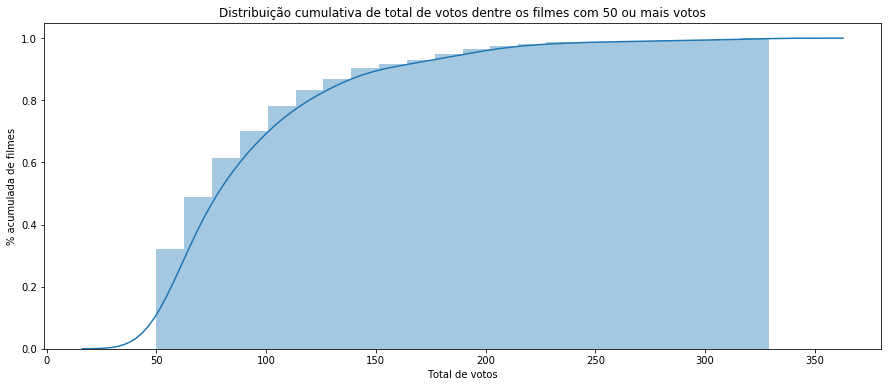

In [98]:
# solução cumulativa
plt.subplots(figsize=(15, 6))
ax = sns.distplot(filmes.total_de_votos, 
                  hist_kws = {'cumulative':True},
                  kde_kws = {'cumulative':True})
ax.set(xlabel="Total de votos", ylabel="% acumulada de filmes")
ax.set_title("Distribuição cumulativa de total de votos dentre os filmes com 50 ou mais votos")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [99]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [100]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [101]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [102]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

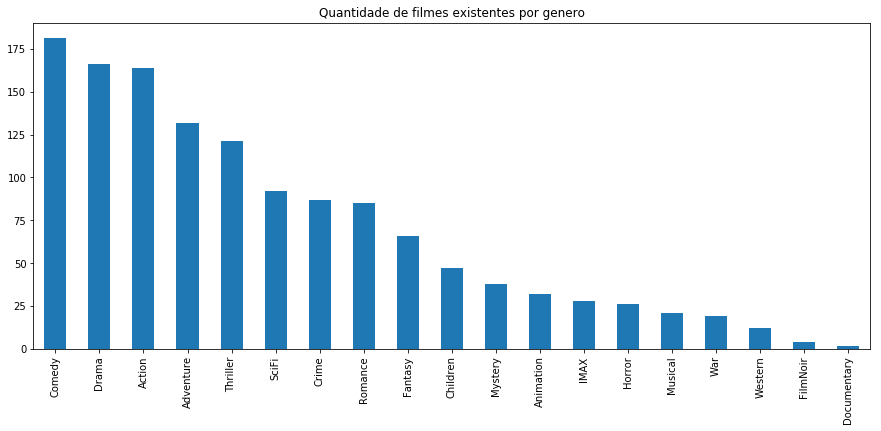

In [103]:
# solução

contagem_de_filmes_de_cada_genero = generos.sum().to_frame()
contagem_de_filmes_de_cada_genero.columns = ["contagem_de_filmes"]
contagem_de_filmes_de_cada_genero.sort_values(by='contagem_de_filmes', inplace=True, ascending=False)
contagem_de_filmes_de_cada_genero.plot(kind='bar', title='Quantidade de filmes existentes por genero', 
                                       figsize=(15, 6), legend=False)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [104]:
# solução
contagem_de_cada_genero = contagem_de_filmes_de_cada_genero
top5_generos_em_quantidade_de_filmes = contagem_de_cada_genero[:5]

In [105]:
print(top5_generos_em_quantidade_de_filmes)

           contagem_de_filmes
Comedy                    181
Drama                     166
Action                    164
Adventure                 132
Thriller                  121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [106]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [107]:
# solucão
votos_por_genero_por_filme = pd.DataFrame(votos_por_genero_por_filme[votos_por_genero_por_filme.sum().sort_values(ascending=False).index])
votos_por_genero_por_filme.head()

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,0.0,0.0,215.0,215.0,0.0,0.0,0.0,0.0,215.0,215.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,102.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,54.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


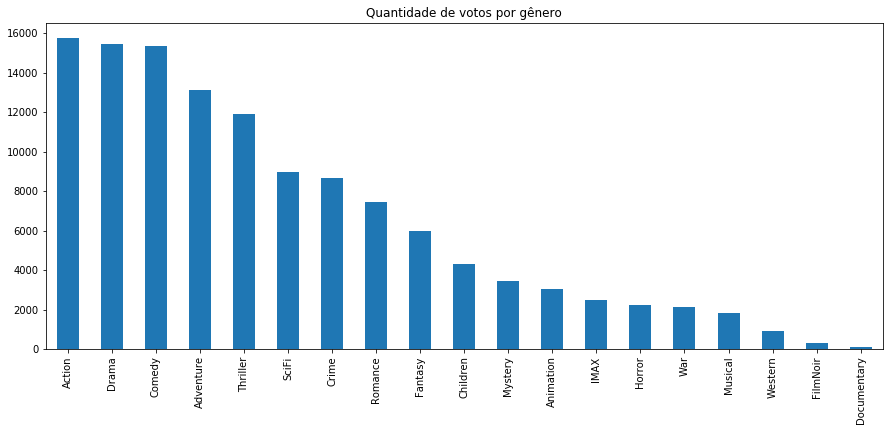

In [108]:
# solução
plt.subplots(figsize=(15, 6))
votos_por_genero_por_filme.sum().plot(kind='bar', title='Quantidade de votos por gênero')

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [109]:
# solucao código
votos_por_filme = votos_por_genero_por_filme.sum()/contagem_de_filmes_de_cada_genero['contagem_de_filmes']
votos_por_filme.sort_values(ascending=False, inplace=True)
votos_por_filme

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

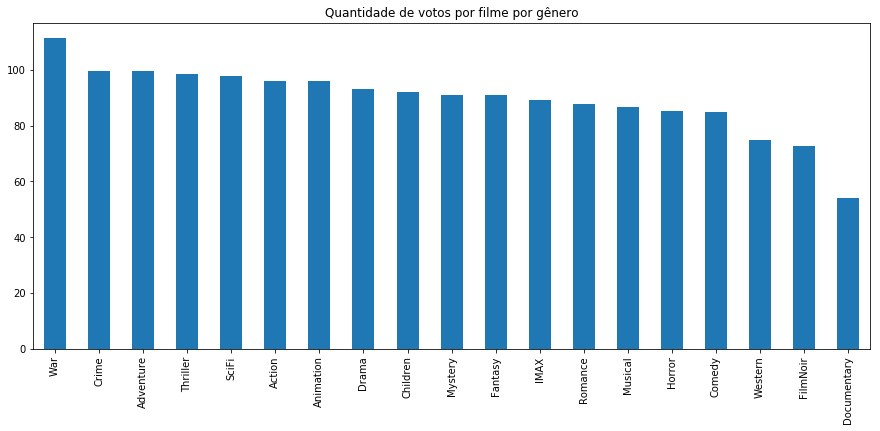

In [110]:
# solução com visualização 
plt.subplots(figsize=(15, 6))
votos_por_filme.plot(kind='bar', title='Quantidade de votos por filme por gênero')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    

- Em filmes existentes por gênero, há muito mais Action (164) do que War (19);
- O mesmo ocorre em votos por gênero, há muito mais votos por gênero para Action (15734) do que War (2113);
- No entanto, ao se comparar a quantidade de votos por filmes de cada gênero, temos "War" em primeiro lugar (111,21) e Action em sexto (95,93);
- Portanto, apesar de War possuir menos votos e filmes existentes, este gênero possui a maior popularidade entre todos os gêneros, ou seja, a maior quantidade de votos por filmes existentes.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuição de total de votos')

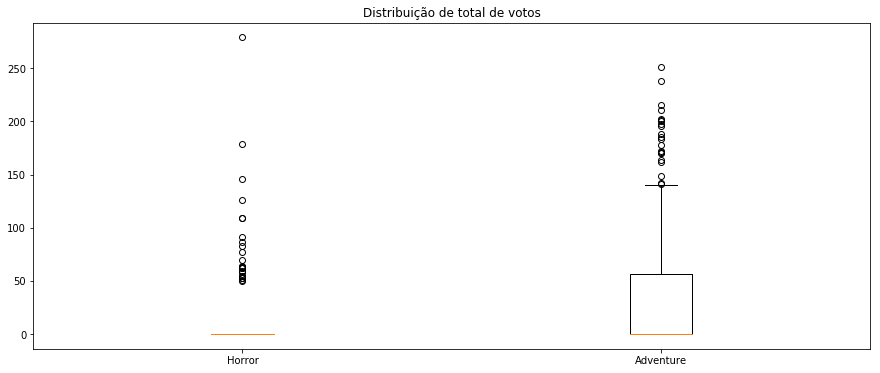

In [111]:
# solução:
plt.subplots(figsize=(15, 6))
plt.boxplot([votos_por_genero_por_filme['Horror'], votos_por_genero_por_filme['Adventure']], 
            labels = ['Horror', 'Adventure'])
plt.title("Distribuição de total de votos")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

[Text(0, 0.5, 'Frequência')]

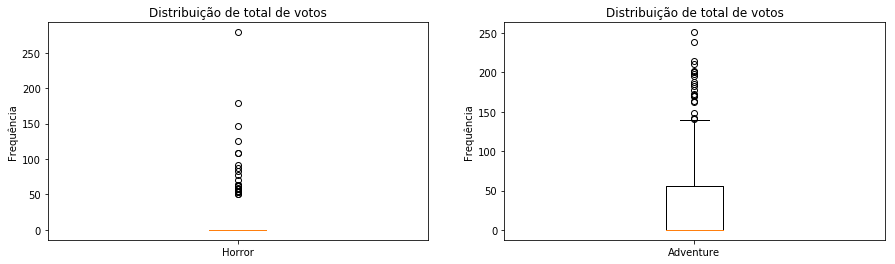

In [112]:
area = plt.figure()
area.set_figwidth(15)

g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

g1.boxplot([votos_por_genero_por_filme['Horror']], labels = ['Horror'])
g1.set_title('Distribuição de total de votos')
g1.set(ylabel="Frequência")

g2.boxplot([votos_por_genero_por_filme['Adventure']], labels = ['Adventure'])
g2.set_title('Distribuição de total de votos')
g2.set(ylabel="Frequência")


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
- O gênero Adventure possui uma popularidade de 99,37 votos por filme;
- Enquanto que o gênero Horror possui uma popularidade de 85,19;
- Portanto, baseando-se nesses dados, sugiro o Adventure, pois este gênero obteve mais votos por filme e provavelmente terá um faturamento maior.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição dos votos de filmes do gênero Adventure')

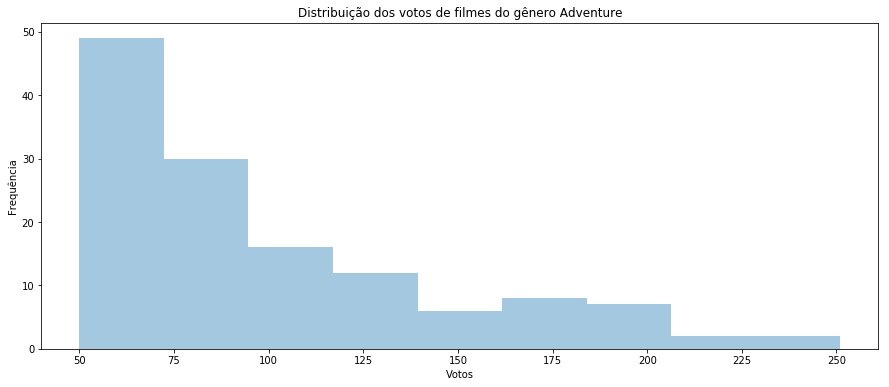

In [113]:
# solucao histograma de aventura
plt.subplots(figsize=(15, 6))
filmes_adventure = list(filmes.query('Adventure==1').index)
selecao = notas['filmeId'].isin(filmes_adventure)
votos_filmes_adventure = notas[selecao]['filmeId'].value_counts()

ax = sns.distplot(votos_filmes_adventure, kde=False)
ax.set(xlabel="Votos", ylabel="Frequência")
ax.set_title("Distribuição dos votos de filmes do gênero Adventure")

Text(0.5, 1.0, 'Distribuição dos votos de filmes do gênero Horror')

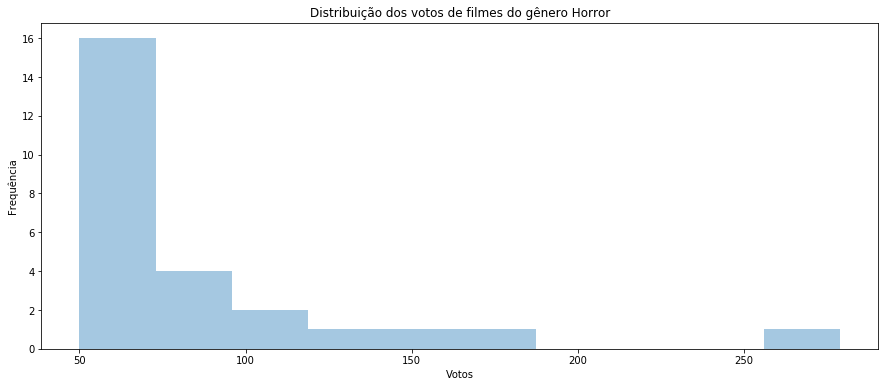

In [114]:
# solucao histograma de horror
plt.subplots(figsize=(15, 6))
filmes_horror = list(filmes.query('Horror==1').index)
selecao = notas['filmeId'].isin(filmes_horror)
votos_filmes_horror = notas[selecao]['filmeId'].value_counts()

ax = sns.distplot(votos_filmes_horror, kde=False)
ax.set(xlabel="Votos", ylabel="Frequência")
ax.set_title("Distribuição dos votos de filmes do gênero Horror")

In [115]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_, p = normaltest(votos_filmes_adventure)
p

5.987863006199115e-06

In [116]:
_, p = normaltest(votos_filmes_horror)
p

1.2786148884334712e-07

Para ambos testes p < 0,05 - não são normais, portanto o T-test e o Z-teste não podem ser aplicados (usar testes não paramétricos)

In [117]:
votos_filmes_adventure.mean()

99.37121212121212

In [118]:
votos_filmes_horror.mean()

85.1923076923077

In [119]:
# solução com o teste desejado
from scipy.stats import ranksums
_, p = ranksums(votos_filmes_adventure, votos_filmes_horror)
p

0.04782366231999856

### Solução (explique sua conclusão):

- A média de votos por filme de Adventure foi de 99,37 enquanto que a de Horror foi de 85,19;
- O teste ranksums, por serem distribuições não normais, foi de 0,0478;
- Como o p-value encontrado ainda é menor que 0,05, podemos descarrtar a hipótese de que as distribuições possam ser iguais, logo a média de votos para Adventure é maior que a de Horror;
- Portanto mantenho minha sugestão em relação ao gênero Adventure.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição de notas')

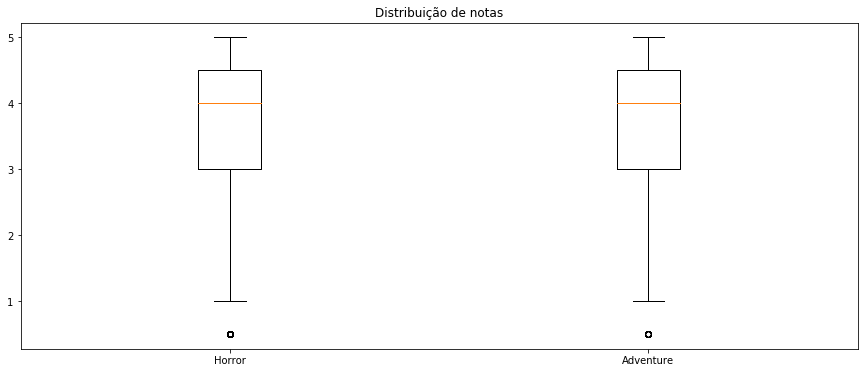

In [120]:
# solução:
plt.subplots(figsize=(15, 6))
selecao = notas['filmeId'].isin(filmes_adventure)
notas_filmes_adventure = notas[selecao]['nota']

selecao = notas['filmeId'].isin(filmes_horror)
notas_filmes_horror = notas[selecao]['nota']

plt.boxplot([notas_filmes_adventure, notas_filmes_horror], 
            labels = ['Horror', 'Adventure'])
plt.title("Distribuição de notas")

[Text(0, 0.5, 'Frequência')]

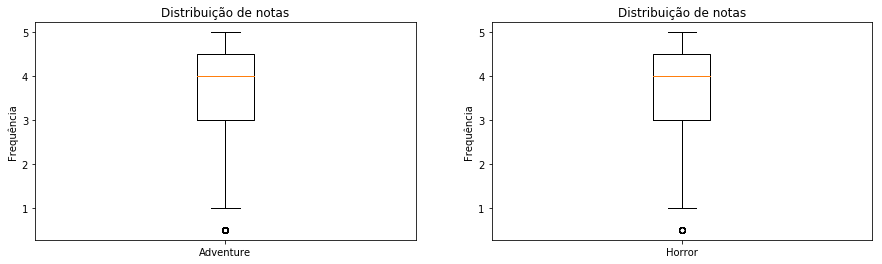

In [121]:
area = plt.figure()
area.set_figwidth(15)

g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

g1.boxplot([notas_filmes_adventure], labels = ['Adventure'])
g1.set_title('Distribuição de notas')
g1.set(ylabel="Frequência")

g2.boxplot([notas_filmes_horror], labels = ['Horror'])
g2.set_title('Distribuição de notas')
g2.set(ylabel="Frequência")


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

- Embora o gênero Horror possua uma popularidade menor que Adventure, a escolha do gênero objetiva apenas um filme que seja sucesso de crítica;
- Pelos testes até agora realizados, não temos como afirmar qual gênero teria mais sucesso de crítica, pois as distribuições aparentam ser bem similares;

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição das notas de filmes do gênero Adventure')

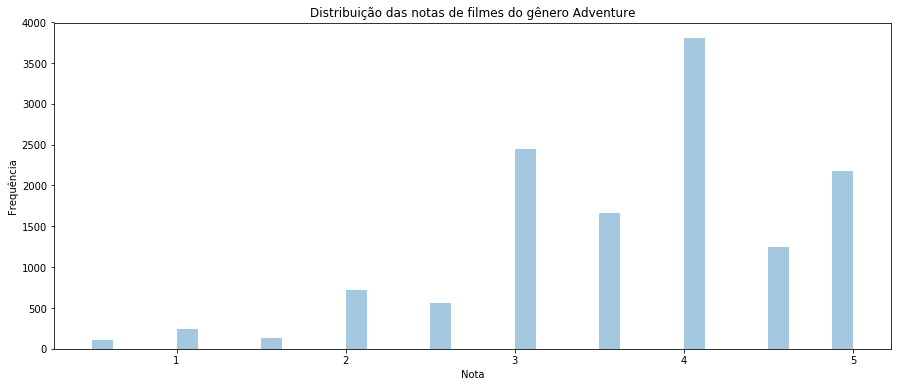

In [122]:
# solucao histograma de aventura
plt.subplots(figsize=(15, 6))
filmes_adventure = list(filmes.query('Adventure==1').index)
selecao = notas['filmeId'].isin(filmes_adventure)
notas_filmes_adventure = notas[selecao]['nota']

ax = sns.distplot(notas_filmes_adventure, kde=False)
ax.set(xlabel="Nota", ylabel="Frequência")
ax.set_title("Distribuição das notas de filmes do gênero Adventure")

Text(0.5, 1.0, 'Distribuição das notas de filmes do gênero Horror')

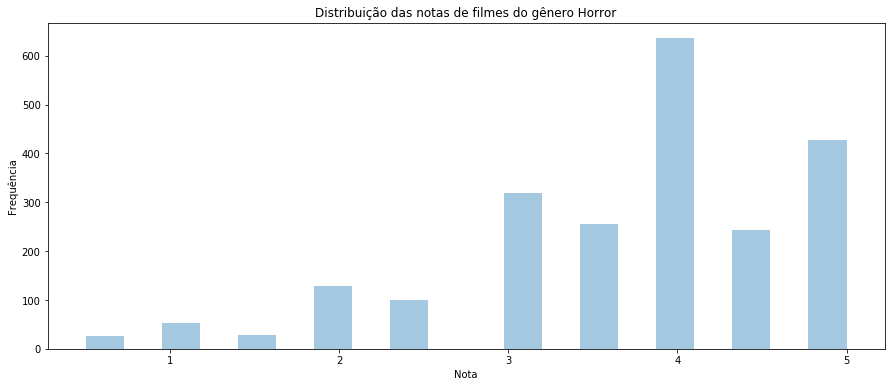

In [123]:
# solucao histograma de horror
plt.subplots(figsize=(15, 6))
filmes_horror = list(filmes.query('Horror==1').index)
selecao = notas['filmeId'].isin(filmes_horror)
notas_filmes_horror = notas[selecao]['nota']

ax = sns.distplot(notas_filmes_horror, kde=False)
ax.set(xlabel="Nota", ylabel="Frequência")
ax.set_title("Distribuição das notas de filmes do gênero Horror")

In [124]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(notas_filmes_adventure)
p

4.149953715365793e-219

In [125]:
_, p = normaltest(notas_filmes_horror)
p

5.338389975242247e-50

Para ambos testes p < 0,05 - não são normais, portanto o T-test e o Z-teste não podem ser aplicados (usar testes não paramétricos)

In [126]:
# solução com o teste desejado
_, p = ranksums(notas_filmes_adventure, notas_filmes_horror)
p

0.0018054332240744037

In [127]:
notas_filmes_adventure.mean()

3.677174658839674

In [128]:
notas_filmes_horror.mean()

3.716704288939052

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

- Inicialmente, eu teria sugerido o gênero Adventure por ter uma popularidade maior que Horror;
- Entretando a nota média para Horror (3,72) é um pouco maior que Adventure (3,68);
- Ao aplicar o teste "ranksums", por serem distribuições não normais, obteve-se um p-value de 0,0018 < 0,05;
- Isso indica que as médias são realmente diferentes, ou seja, a média de Horror tem grande probabilidade (99,82%) de ser maior que a média de Adventure;
- Portanto, apesar de Adventure apresentar maior popularidade, sugiro Horror por apresentar, com alto grau de confiança, uma média maior de suas notas, pois o objetivo é alcançar um maior sucesso de crítica em nota alta.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

- Embora a média das notas de Horror seja maior que a de Adventure a diferença é bem pequena;
- Entretanto, ao observarmos a distribuição de total de votos, pelo boxplot, podemos perceber que Adventure possui muito mais votos que Horror, independetemente da quantidade de filmes;
- Isto sugere um publico maior para Adventure;
- Portanto, levando-se em conta esses dois parâmetros, o gênero Adventure aparenta ser mais promissor.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [129]:
votos_por_genero_por_filme.head()

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,0.0,0.0,215.0,215.0,0.0,0.0,0.0,0.0,215.0,215.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,102.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,54.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# solução: calculando os 2 generos mais votados
genero_mais_votados_1 = votos_por_genero_por_filme.sum().sort_values(ascending=False).index[0]
print("Primeiro mais votado: " + genero_mais_votados_1)
genero_mais_votados_2 = votos_por_genero_por_filme.sum().sort_values(ascending=False).index[1]
print("Segundo mais votado:  " + genero_mais_votados_2)

Primeiro mais votado: Action
Segundo mais votado:  Drama


In [131]:
lista_filmes_mais_vistos_1 = votos_por_genero_por_filme[genero_mais_votados_1].to_frame()
lista_filmes_mais_vistos_1['indice_50_votos'] = lista_filmes_mais_vistos_1.index
lista_filmes_mais_vistos_1.columns = ['votos', 'indice_50_votos']

lista_filmes_mais_vistos_2 = votos_por_genero_por_filme[genero_mais_votados_2].to_frame()
lista_filmes_mais_vistos_2['indice_50_votos'] = lista_filmes_mais_vistos_2.index
lista_filmes_mais_vistos_2.columns = ['votos', 'indice_50_votos']

lista_filmes_mais_vistos_top2 = pd.concat([lista_filmes_mais_vistos_1, lista_filmes_mais_vistos_2], ignore_index=True)

In [132]:
# solução: encontrando os top 5 filmes desses generos
lista_filmes_mais_vistos_top2.sort_values(by='votos', ascending=False, inplace=True)

def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista = list(lista_filmes_mais_vistos_top2[:5]['indice_50_votos'].values)
if(len(remove_repetidos(lista)) == 5):
    top5 = lista_filmes_mais_vistos_top2[:5]['indice_50_votos'].values
else:
    print("PARAR!!!")
    print("Filme repetido no top5")

filmes.iloc[top5]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
356,Forrest Gump (1994),1994.0,4.164134,329.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296,Pulp Fiction (1994),1994.0,4.197068,307.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2571,"Matrix, The (1999)",1999.0,4.192446,278.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [133]:
print("Top 5 filmes dos 2 generos mais assistidos ({} e {}):".format(genero_mais_votados_1, genero_mais_votados_2))
for i in range(5):
    print("{}º - com {} votos - {}".format(i + 1, lista_filmes_mais_vistos_top2['votos'].iloc[i], filmes['titulo'].iloc[top5[i]]))

Top 5 filmes dos 2 generos mais assistidos (Action e Drama):
1º - com 329.0 votos - Forrest Gump (1994)
2º - com 317.0 votos - Shawshank Redemption, The (1994)
3º - com 307.0 votos - Pulp Fiction (1994)
4º - com 278.0 votos - Matrix, The (1999)
5º - com 251.0 votos - Star Wars: Episode IV - A New Hope (1977)


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [134]:
# solucao
series = filmes.corr().round(4)[votos_por_genero_por_filme.columns].loc['nota_media']

nome_genero_maior_correlacao_nota_media_1 = series.abs().sort_values(ascending=False).index[0]
nome_genero_maior_correlacao_nota_media_2 = series.abs().sort_values(ascending=False).index[1]

corr_genero_maior_correlacao_nota_media_1 = series[nome_genero_maior_correlacao_nota_media_1]
corr_genero_maior_correlacao_nota_media_2 = series[nome_genero_maior_correlacao_nota_media_2]

nome_genero_menor_correlacao_nota_media_1 = series.abs().sort_values().index[0]
nome_genero_menor_correlacao_nota_media_2 = series.abs().sort_values().index[1]

corr_genero_menor_correlacao_nota_media_1 = series[nome_genero_menor_correlacao_nota_media_1]
corr_genero_menor_correlacao_nota_media_2 = series[nome_genero_menor_correlacao_nota_media_2]

print('Os dois gêneros com maior valor de correlação com a nota média são:')
print('1º - com correlação de {} - {}'.format(corr_genero_maior_correlacao_nota_media_1, 
                                              nome_genero_maior_correlacao_nota_media_1))
print('2º - com correlação de {} - {}'.format(corr_genero_maior_correlacao_nota_media_2, 
                                              nome_genero_maior_correlacao_nota_media_2))

print('')
print('Os dois gêneros com menor valor de correlação com a nota média são:')
print('1º - com correlação de {} - {}'.format(corr_genero_menor_correlacao_nota_media_1, 
                                              nome_genero_menor_correlacao_nota_media_1))
print('2º - com correlação de {} - {}'.format(corr_genero_menor_correlacao_nota_media_2, 
                                              nome_genero_menor_correlacao_nota_media_2))

Os dois gêneros com maior valor de correlação com a nota média são:
1º - com correlação de 0.2777 - Drama
2º - com correlação de -0.256 - Comedy

Os dois gêneros com menor valor de correlação com a nota média são:
1º - com correlação de -0.0035 - Documentary
2º - com correlação de -0.0085 - Musical


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [135]:
# solucao
series = filmes.corr().round(4)[votos_por_genero_por_filme.columns].loc['total_de_votos']

nome_genero_maior_correlacao_total_de_votos_1 = series.abs().sort_values(ascending=False).index[0]
nome_genero_maior_correlacao_total_de_votos_2 = series.abs().sort_values(ascending=False).index[1]

corr_genero_maior_correlacao_total_de_votos_1 = series[nome_genero_maior_correlacao_total_de_votos_1]
corr_genero_maior_correlacao_total_de_votos_2 = series[nome_genero_maior_correlacao_total_de_votos_2]

nome_genero_menor_correlacao_total_de_votos_1 = series.abs().sort_values().index[0]
nome_genero_menor_correlacao_total_de_votos_2 = series.abs().sort_values().index[1]

corr_genero_menor_correlacao_total_de_votos_1 = series[nome_genero_menor_correlacao_total_de_votos_1]
corr_genero_menor_correlacao_total_de_votos_2 = series[nome_genero_menor_correlacao_total_de_votos_2]

print('Os dois gêneros com maior valor de correlação com o total de votos são:')
print('1º - com correlação de {} - {}'.format(corr_genero_maior_correlacao_total_de_votos_1, 
                                              nome_genero_maior_correlacao_total_de_votos_1))
print('2º - com correlação de {} - {}'.format(corr_genero_maior_correlacao_total_de_votos_2, 
                                              nome_genero_maior_correlacao_total_de_votos_2))

print('')
print('Os dois gêneros com menor valor de correlação com o total de votos são:')
print('1º - com correlação de {} - {}'.format(corr_genero_menor_correlacao_total_de_votos_1, 
                                              nome_genero_menor_correlacao_total_de_votos_1))
print('2º - com correlação de {} - {}'.format(corr_genero_menor_correlacao_total_de_votos_2, 
                                              nome_genero_menor_correlacao_total_de_votos_2))

Os dois gêneros com maior valor de correlação com o total de votos são:
1º - com correlação de -0.1285 - Comedy
2º - com correlação de 0.1044 - Adventure

Os dois gêneros com menor valor de correlação com o total de votos são:
1º - com correlação de 0.0018 - Children
2º - com correlação de -0.0071 - Mystery


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

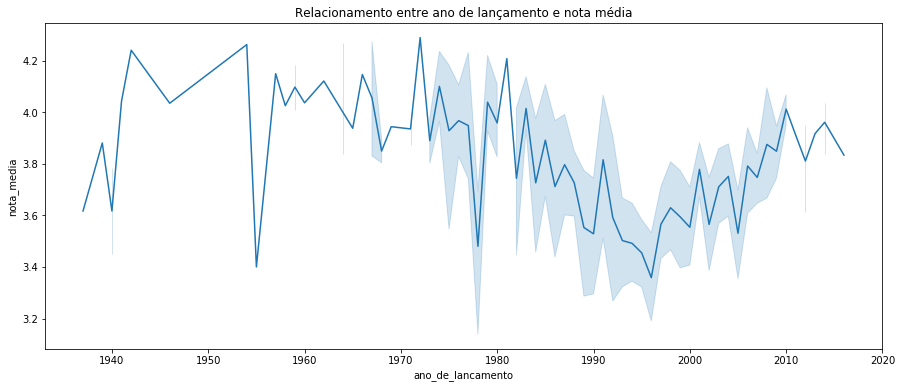

In [136]:
# solucao
plt.subplots(figsize=(15, 6))
ax = sns.lineplot(x=filmes['ano_de_lancamento'], y=filmes['nota_media'])
ax.set_title("Relacionamento entre ano de lançamento e nota média")
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [137]:
# solução (código)
filmes[['ano_de_lancamento', 'nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


Text(0.5, 1.0, 'Distribuição de filmes por ano de laçamento')

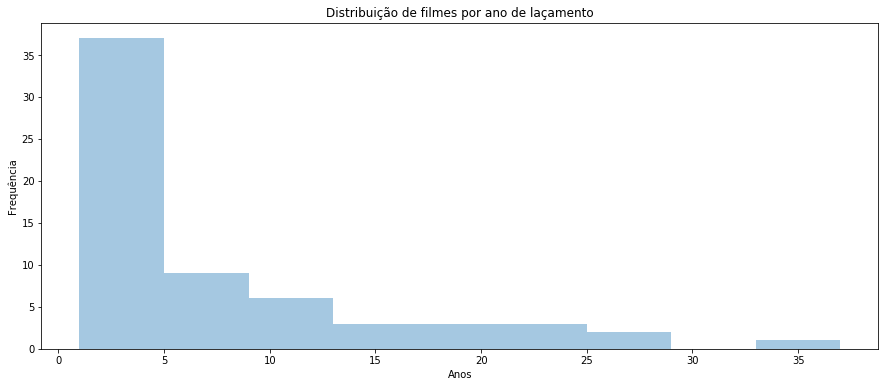

In [138]:
plt.subplots(figsize=(15, 6))
ax = sns.distplot(filmes['ano_de_lancamento'].value_counts(), kde = False)
ax.set(xlabel="Anos", ylabel="Frequência")
ax.set_title("Distribuição de filmes por ano de laçamento")

Text(0, 0.5, 'Quantidade')

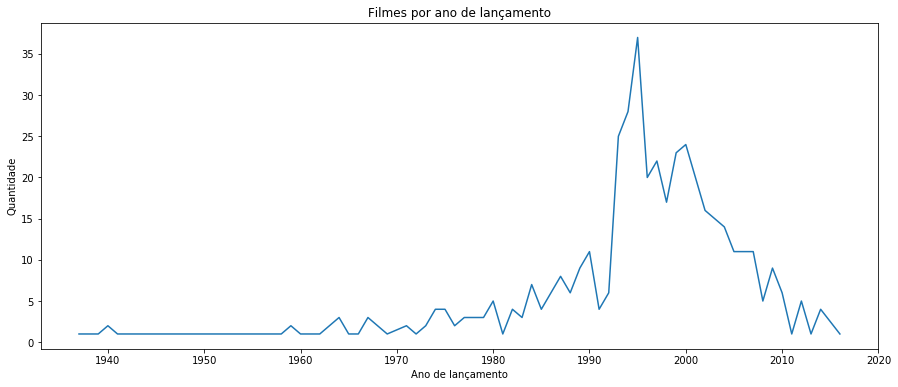

In [139]:
plt.subplots(figsize=(15, 6))
plt.plot(filmes['ano_de_lancamento'].value_counts().sort_index())
plt.title('Filmes por ano de lançamento')
plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade')

In [140]:
filmes['ano_de_lancamento'].value_counts().describe()

count    64.000000
mean      7.031250
std       8.106374
min       1.000000
25%       1.000000
50%       4.000000
75%       9.500000
max      37.000000
Name: ano_de_lancamento, dtype: float64

### Solução (explicação)

- A mediana na quantidade de filmes por ano de lançamento é de 4, a média é de 7,03 e o valor máximo é de 37 em apenas 64 anos diferentes;
- Isso indica que temos uma amostra pequena de filmes para a maioria dos anos de lançamento além de termos uma concentração muito maior de filmes em poucos anos;
- Com tão poucas amostras para cada ano em muitos casos e muito mais amostras em outros, a correlação calculada não é muito confiável;
- Além disso, pelos gráficos acima, podemos observar que temos mais filmes justamente onde as notas médias são mais baixas;
- Portanto, essa comparação entre os anos de lançamento é injusta, pois a quantidade muito maior de filmes justamente onde as notas são mais baixas distorce o resultado da correlação entre essas duas variáveis.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

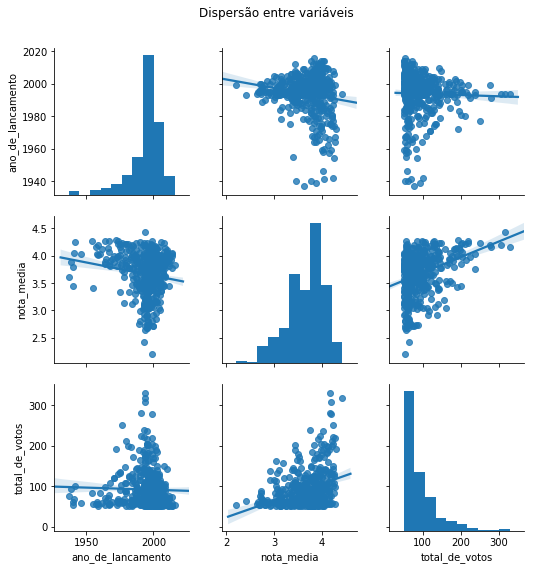

In [141]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(infos, kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

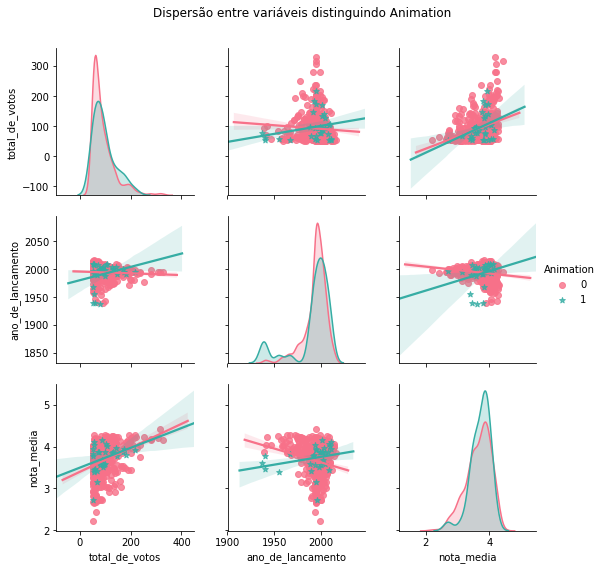

In [142]:
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos', 'Animation']]
ax = sns.pairplot(data=infos, vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'],
                  hue='Animation', palette='husl', markers=["o", "*"], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis distinguindo Animation', y=1.05)
ax

In [143]:
infos.query('Animation==0').corr()

,ano_de_lancamento,nota_media,total_de_votos,Animation
ano_de_lancamento,1.000000,-0.203418,-0.061979,NaN
nota_media,-0.203418,1.000000,0.342297,NaN
total_de_votos,-0.061979,0.342297,1.000000,NaN
Animation,NaN,NaN,NaN,NaN


In [144]:
infos.query('Animation==1').corr()

,ano_de_lancamento,nota_media,total_de_votos,Animation
ano_de_lancamento,1.000000,0.257450,0.252803,NaN
nota_media,0.257450,1.000000,0.342205,NaN
total_de_votos,0.252803,0.342205,1.000000,NaN
Animation,NaN,NaN,NaN,NaN


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

- Apesar dessa correlação parecer ser baixa (+0,257450) ainda é significativamente, em módulo, maior que a correlação de todos os gêneros entre as mesmas variáveis (-0,203418) e aparenta ser linear;
- Em relação à correlação entre ano_de_lancamento e total_de_votos, a diferença é ainda maior, pois em Animation temos +0.252803 sendo que nos demais filmes temos -0,061979;
- Em ambos casos as correlações de Animation apresentaram-se positivas, enquanto que na dos demais filmes elas são negativas;
- Essas evidências nos levam a acreditar que os filmes do gênero Animation seguem uma tendência oposta aos demais filmes. Enquanto a popularidade e a satisfação dos outros filmes estão caindo a cada ano, o oposto ocorre com os filmes de Animation.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Comparando os gêneros Fantasy e Children

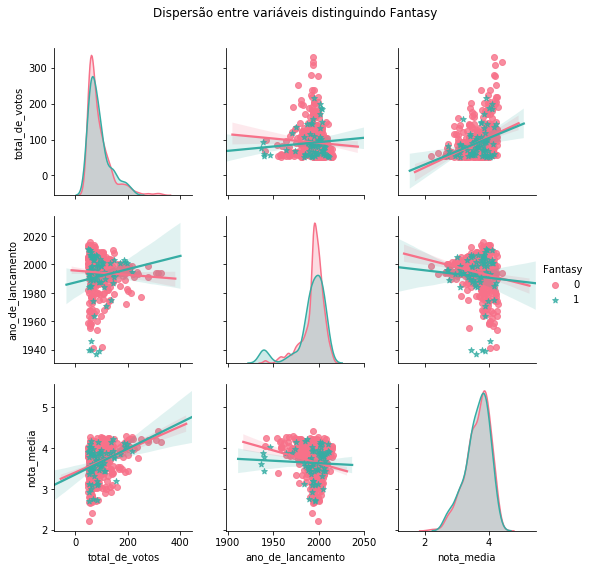

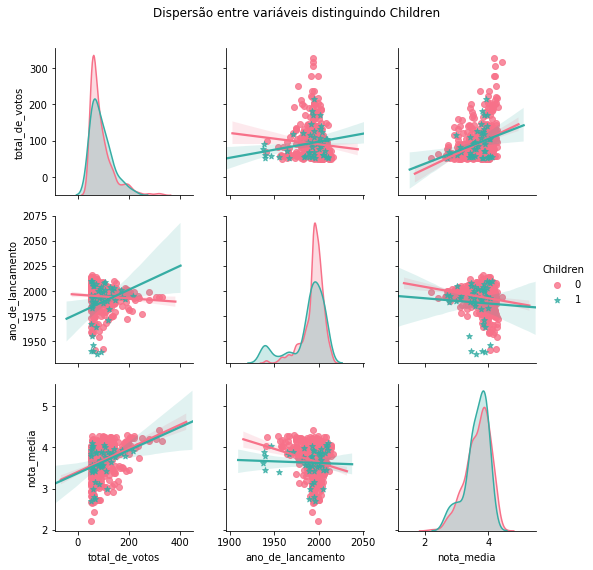

In [145]:
# solução
for i in range(8, 10):
    genero_analisado = votos_por_genero_por_filme.columns[i]
    infos_2 = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos', genero_analisado]]
    ax = sns.pairplot(data=infos_2, vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'],
                      hue=genero_analisado, palette='husl', markers=["o", "*"], kind='reg')
    ax.fig.suptitle('Dispersão entre variáveis distinguindo {}'.format(genero_analisado), y=1.05)
    ax

In [146]:
votos_por_genero_por_filme[['Fantasy', 'Children']].corr()

,Fantasy,Children
Fantasy,1.000000,0.373971
Children,0.373971,1.000000


### Observação:

- Ao analisar o pairplot dos filmes de Fantasy e depois os de Children com os demais filmes, pode-se perceber uma certa semelhança em suas distribuições;
- Um teste de correlação entre as variáveis Fantasy e Children demonstrou a maior correlação até agora encontrada;
- Isso pode ser uma evidência de que ambos gêneros tenham algo em comum.

In [147]:
numero_de_filmes_de_fantasy = votos_por_genero_por_filme.query('Fantasy!=0').count()[0]
numero_de_filmes_de_children = votos_por_genero_por_filme.query('Children!=0').count()[0]
numero_de_filmes_de_fantasy_e_children = votos_por_genero_por_filme.query('(Fantasy!=0) & (Children!=0)').count()[0]
numero_de_filmes_de_fantasy_ou_children = votos_por_genero_por_filme.query('(Fantasy!=0) | (Children!=0)').count()[0]
print('Filmes de Fantasy: {}'.format(numero_de_filmes_de_fantasy))
print('Filmes de Children: {}'.format(numero_de_filmes_de_children))
print('Filmes de Fantasy e Children: {}'.format(numero_de_filmes_de_fantasy_e_children))
print('Filmes de Fantasy ou Children: {}'.format(numero_de_filmes_de_fantasy_ou_children))
print('Proporção da intersecção dos gêneros: {}'.format(numero_de_filmes_de_fantasy_e_children/numero_de_filmes_de_fantasy_ou_children))

Filmes de Fantasy: 66
Filmes de Children: 47
Filmes de Fantasy e Children: 25
Filmes de Fantasy ou Children: 88
Proporção da intersecção dos gêneros: 0.2840909090909091


Embora tenha uma parte dos filmes que possuem ambos gêneros, esta representa apenas 28,41% do total de filmes destes gêneros.

Text(0.5, 1.0, 'Distribuição dos votos de filmes do gênero Fantasy')

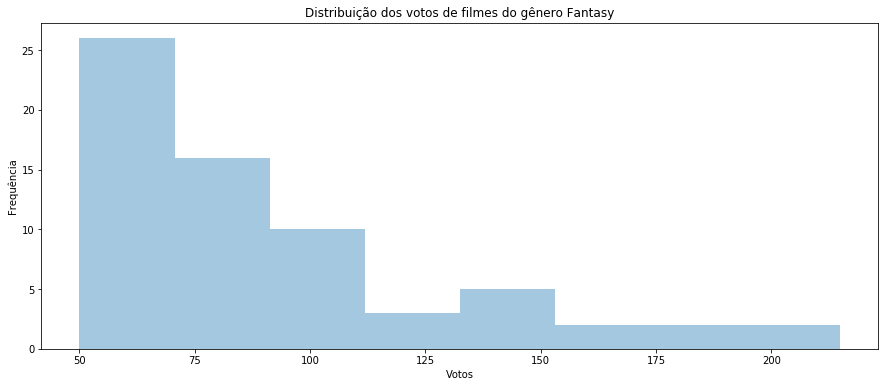

In [148]:
plt.subplots(figsize=(15, 6))
filmes_fantasy = list(filmes.query('Fantasy==1').index)
selecao = notas['filmeId'].isin(filmes_fantasy)
votos_filmes_fantasy = notas[selecao]['filmeId'].value_counts()

ax = sns.distplot(votos_filmes_fantasy, kde=False)
ax.set(xlabel="Votos", ylabel="Frequência")
ax.set_title("Distribuição dos votos de filmes do gênero Fantasy")

Text(0.5, 1.0, 'Distribuição dos votos de filmes do gênero Children')

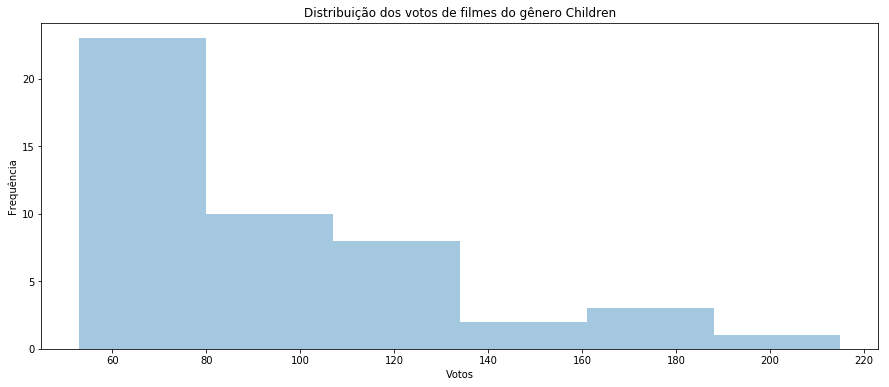

In [149]:
plt.subplots(figsize=(15, 6))
filmes_children = list(filmes.query('Children==1').index)
selecao = notas['filmeId'].isin(filmes_children)
votos_filmes_children = notas[selecao]['filmeId'].value_counts()

ax = sns.distplot(votos_filmes_children, kde=False)
ax.set(xlabel="Votos", ylabel="Frequência")
ax.set_title("Distribuição dos votos de filmes do gênero Children")

In [150]:
_, p = normaltest(votos_filmes_fantasy)
p

9.582047863821733e-05

In [151]:
_, p = normaltest(votos_filmes_children)
p

0.0025777062557016625

Para ambos testes p < 0,05 - não são normais, portanto o T-test e o Z-teste não podem ser aplicados (usar testes não paramétricos)

In [152]:
votos_filmes_fantasy.mean()

90.8030303030303

In [153]:
votos_filmes_children.mean()

92.14893617021276

In [154]:
_, p = ranksums(votos_filmes_fantasy, votos_filmes_children)
p

0.820278974152001

### Observação:

- O p-value encontrado entre as distribuições de votos por filme de Fantasy e Children foi de 0,8203 que é um alto indício de que essas distribuições são semelhantes; 
- Além disso, suas médias de votos são bem próximas.

Text(0.5, 1.0, 'Distribuição de notas')

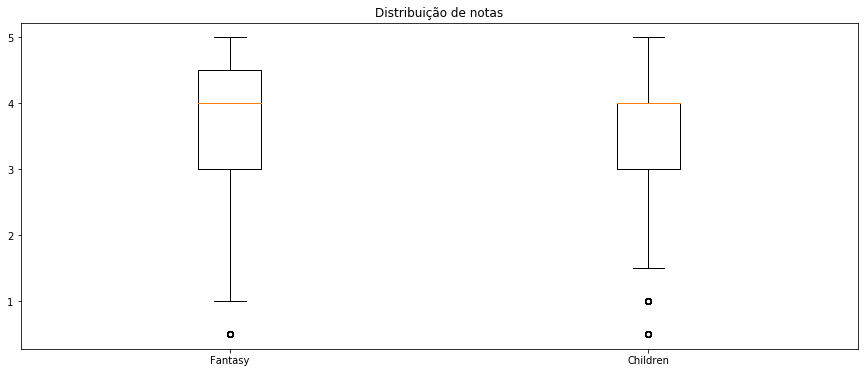

In [155]:
plt.subplots(figsize=(15, 6))
selecao = notas['filmeId'].isin(filmes_fantasy)
notas_filmes_fantasy = notas[selecao]['nota']

selecao = notas['filmeId'].isin(filmes_children)
notas_filmes_children = notas[selecao]['nota']

plt.boxplot([notas_filmes_fantasy, notas_filmes_children], 
            labels = ['Fantasy', 'Children'])
plt.title("Distribuição de notas")

Text(0.5, 1.0, 'Distribuição das notas de filmes do gênero Fantasy')

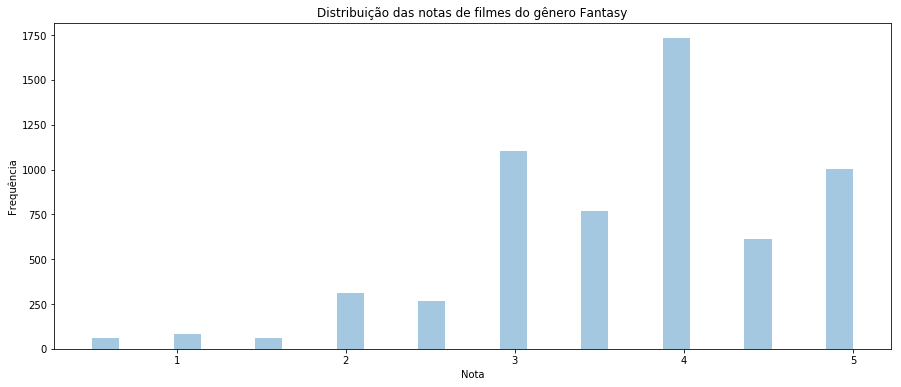

In [156]:
plt.subplots(figsize=(15, 6))
filmes_fantasy = list(filmes.query('Fantasy==1').index)
selecao = notas['filmeId'].isin(filmes_fantasy)
notas_filmes_fantasy = notas[selecao]['nota']

ax = sns.distplot(notas_filmes_fantasy, kde=False)
ax.set(xlabel="Nota", ylabel="Frequência")
ax.set_title("Distribuição das notas de filmes do gênero Fantasy")

Text(0.5, 1.0, 'Distribuição das notas de filmes do gênero Children')

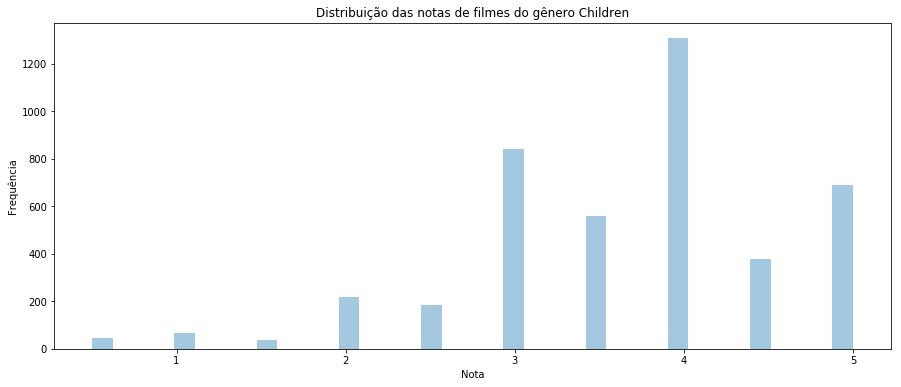

In [157]:
plt.subplots(figsize=(15, 6))
filmes_children = list(filmes.query('Children==1').index)
selecao = notas['filmeId'].isin(filmes_children)
notas_filmes_children = notas[selecao]['nota']

ax = sns.distplot(notas_filmes_children, kde=False)
ax.set(xlabel="Nota", ylabel="Frequência")
ax.set_title("Distribuição das notas de filmes do gênero Children")

In [158]:
_, p = normaltest(notas_filmes_fantasy)
p

6.18439885270707e-107

In [159]:
_, p = normaltest(notas_filmes_children)
p

9.035658895089238e-79

Para ambos testes p < 0,05 - não são normais, portanto o T-test e o Z-teste não podem ser aplicados (usar testes não paramétricos)

In [160]:
_, p = ranksums(notas_filmes_fantasy, notas_filmes_children)
p

0.1458427217060559

In [161]:
notas_filmes_fantasy.mean()

3.6987318538294676

In [162]:
notas_filmes_children.mean()

3.675248210574925

### Observação:

- A média dos filmes de Fantasy é um pouco maior que a média de Children;
- Entretanto, o p-value encontrado entre essas duas distribuições é de 0,1458 > 0,05;
- Com esse p-value, não podemos descartar a hipótese nula, de que as distribuições são iguais, e portanto, não podemos afirmar que uma média é maior que a outra;
- Dessa forma, podemos assumir que as médias podem ser iguais.

### Conclusão

- Ao comparar as notas e as popularidades dos filmes de Fantasy com os de Children, foi possível observar algumas semelhanças;
- As notas possuem distribuições bem semelhantes entre os dois gêneros;
- Quanto à distribuição da popularidade, estas são mais semelhantes ainda;
- Estes dados estatísticos podem indicar que ambos gêneros possuam características em comum, como, por exemplo, grande parte de seus públicos em comum, entre várias outras;
- Talvez tais dados possam servir de embasamento para alguns insights em uma futura investigação mais aprofundada.